=== PROBLEM 1: Fibonacci SuperFast! ===
F(1) = 1
F(2) = 1
F(3) = 2
F(4) = 3
F(5) = 5
F(6) = 8
F(7) = 13
F(8) = 21
F(9) = 34
F(10) = 55

Time Complexity: T(n) = T(n/2) + O(1) → O(log n)
Each step performs constant-size (2x2) matrix multiplications.

=== PROBLEM 2: 0/1 Knapsack ===
Maximum value (2D DP): 10
Maximum value (Optimized 1D DP): 10
Space Complexity Reduced to O(W)

=== PROBLEM 3: NeuroComputing ===


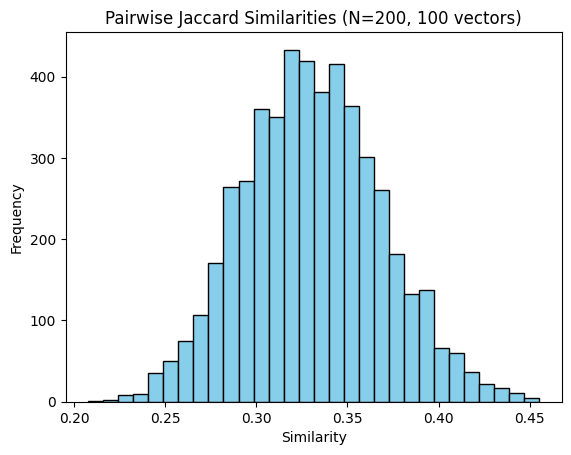

Mean Jaccard similarity: 0.3310
→ Distribution is approximately Gaussian due to Central Limit Theorem.

N=100: Mean=0.3315, Std=0.0543
N=500: Mean=0.3343, Std=0.0251
N=1000: Mean=0.3336, Std=0.0171

As N increases, variance decreases → distribution becomes narrower.

For N=2000, w=5:
Number of possible sparse vectors = 2.653e+14
Information capacity ≈ 47.915 bits (~0.0240 bits/component)

Capacity interpretation:
- Combinatorial capacity: log2(C(N, w)) bits.
- Larger N with fixed small w → exponentially many sparse vectors.
- In associative memory terms, capacity ≈ number of distinct patterns storable without interference.

=== END OF PROBLEM SET #3 ===


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import math
from math import comb

# ==============================================================
# PROBLEM 1 — Fibonacci SuperFast
# ==============================================================
print("=== PROBLEM 1: Fibonacci SuperFast! ===")

def matrix_mult(A, B):
    """Multiply two 2x2 matrices."""
    return [
        [A[0][0]*B[0][0] + A[0][1]*B[1][0],
         A[0][0]*B[0][1] + A[0][1]*B[1][1]],
        [A[1][0]*B[0][0] + A[1][1]*B[1][0],
         A[1][0]*B[0][1] + A[1][1]*B[1][1]]
    ]

def matrix_power(M, n):
    """Fast exponentiation by squaring for matrix power."""
    if n == 0:
        return [[1, 0], [0, 1]]  # Identity matrix
    if n == 1:
        return M
    half = matrix_power(M, n // 2)
    half_sq = matrix_mult(half, half)
    return matrix_mult(M, half_sq) if n % 2 else half_sq

def fibonacci_fast(n):
    """Compute nth Fibonacci number using matrix exponentiation."""
    if n == 0:
        return 0
    M = [[1, 1], [1, 0]]
    Mn = matrix_power(M, n - 1)
    return Mn[0][0]  # F(n)

# Example:
for i in range(1, 11):
    print(f"F({i}) = {fibonacci_fast(i)}")

print("\nTime Complexity: T(n) = T(n/2) + O(1) → O(log n)")
print("Each step performs constant-size (2x2) matrix multiplications.\n")

# ==============================================================
# PROBLEM 2 — 0/1 Knapsack Algorithm
# ==============================================================
print("=== PROBLEM 2: 0/1 Knapsack ===")

# Example items (weights, values)
weights = [2, 3, 4, 5]
values = [3, 4, 5, 6]
W = 8  # total capacity
n = len(values)

def knapsack_dp(weights, values, W):
    """Standard DP solution: O(nW) time, O(nW) space."""
    n = len(weights)
    dp = [[0]*(W+1) for _ in range(n+1)]
    for i in range(1, n+1):
        for w in range(W+1):
            if weights[i-1] <= w:
                dp[i][w] = max(dp[i-1][w],
                               dp[i-1][w-weights[i-1]] + values[i-1])
            else:
                dp[i][w] = dp[i-1][w]
    return dp[n][W]

def knapsack_optimized(weights, values, W):
    """Optimized DP: O(nW) time, O(W) space."""
    dp = [0]*(W+1)
    for i in range(len(weights)):
        for w in range(W, weights[i]-1, -1):
            dp[w] = max(dp[w], dp[w-weights[i]] + values[i])
    return dp[W]

print("Maximum value (2D DP):", knapsack_dp(weights, values, W))
print("Maximum value (Optimized 1D DP):", knapsack_optimized(weights, values, W))
print("Space Complexity Reduced to O(W)\n")

# ==============================================================
# PROBLEM 3 — NeuroComputing!
# ==============================================================
print("=== PROBLEM 3: NeuroComputing ===")

# 3.1 Generate random binary vectors
def generate_random_binary_vectors(num_vec=100, N=100, p=0.5):
    return (np.random.rand(num_vec, N) < p).astype(int)

# 3.2 Similarity functions
def sim_norm(x, y):
    num = (x & y).sum()
    denom = x.sum() * y.sum()
    return num / denom if denom > 0 else 0.0

def jaccard(x, y):
    inter = (x & y).sum()
    union = (x | y).sum()
    return inter / union if union > 0 else 0.0

# Generate 100 binary vectors of length N
N = 200
vecs = generate_random_binary_vectors(100, N)

# Compute pairwise Jaccard similarities
sims = []
for i in range(len(vecs)):
    for j in range(i+1, len(vecs)):
        sims.append(jaccard(vecs[i], vecs[j]))

# Plot histogram of similarities
plt.hist(sims, bins=30, color='skyblue', edgecolor='black')
plt.title(f"Pairwise Jaccard Similarities (N={N}, 100 vectors)")
plt.xlabel("Similarity")
plt.ylabel("Frequency")
plt.show()

print(f"Mean Jaccard similarity: {np.mean(sims):.4f}")
print("→ Distribution is approximately Gaussian due to Central Limit Theorem.\n")

# 3.3 Larger N experiment
for N_test in [100, 500, 1000]:
    vecs = generate_random_binary_vectors(100, N_test)
    sims = []
    for i in range(len(vecs)):
        for j in range(i+1, len(vecs)):
            sims.append(jaccard(vecs[i], vecs[j]))
    print(f"N={N_test}: Mean={np.mean(sims):.4f}, Std={np.std(sims):.4f}")
print("\nAs N increases, variance decreases → distribution becomes narrower.\n")

# 3.4 Sparse vectors count
N = 2000
w = 5
num_vectors = comb(N, w)
bits = math.log2(num_vectors)
print(f"For N={N}, w={w}:")
print(f"Number of possible sparse vectors = {num_vectors:.3e}")
print(f"Information capacity ≈ {bits:.3f} bits (~{bits/2000:.4f} bits/component)\n")

# 3.5 Capacity discussion (printed summary)
print("Capacity interpretation:")
print("- Combinatorial capacity: log2(C(N, w)) bits.")
print("- Larger N with fixed small w → exponentially many sparse vectors.")
print("- In associative memory terms, capacity ≈ number of distinct patterns storable without interference.\n")

print("=== END OF PROBLEM SET #3 ===")


In [2]:
/content/Algorithm1_2025/25_2/14/ex3.ipynb


NameError: name 'content' is not defined

In [3]:
%cd /content/Algorithm1_2025/25_2/14


[Errno 2] No such file or directory: '/content/Algorithm1_2025/25_2/14'
/content


In [4]:
!ls /content/Algorithm1_2025


ls: cannot access '/content/Algorithm1_2025': No such file or directory


In [5]:
!git clone https://github.com/gilgameshjw/Algorithm1_2025.git
%cd Algorithm1_2025


Cloning into 'Algorithm1_2025'...
remote: Enumerating objects: 885, done.
remote: Counting objects: 100% (319/319), done.
remote: Compressing objects: 100% (228/228), done.
remote: Total 885 (delta 170), reused 195 (delta 88), pack-reused 566 (from 2)
Receiving objects: 100% (885/885), 38.96 MiB | 31.00 MiB/s, done.
Resolving deltas: 100% (375/375), done.
/content/Algorithm1_2025


In [6]:
!git branch -a


* main
  remotes/origin/25-1/12/ex_2_outputs
  remotes/origin/25_02-s_4
  remotes/origin/25_1_13
  remotes/origin/25_1_17
  remotes/origin/25_1_2
  remotes/origin/25_1_5
  remotes/origin/25_1_s_6
  remotes/origin/25_2-s_2
  remotes/origin/25_2_1
  remotes/origin/25_2_10
  remotes/origin/25_2_16
  remotes/origin/25_2_18
  remotes/origin/25_2_19
  remotes/origin/25_2_3
  remotes/origin/25_2_7
  remotes/origin/25_2_s_15
  remotes/origin/HEAD -> origin/main
  remotes/origin/akan_zholdygali
  remotes/origin/algo_1_sabitov_yasin
  remotes/origin/erniyaz_ashuov
  remotes/origin/exo_2_8
  remotes/origin/eyesullu-exo2
  remotes/origin/eyesullu-exo_2
  remotes/origin/main
  remotes/origin/meirambek-solution
  remotes/origin/nursultan_11
  remotes/origin/three_algorhithms_8
  remotes/origin/yelaman_seiitkhanuly


In [7]:
%cd /content/Algorithm1_2025


/content/Algorithm1_2025


In [8]:
!git checkout -b 25_2_14


Switched to a new branch '25_2_14'


In [9]:
!mkdir -p /content/Algorithm1_2025/25_2/14


In [10]:
!cp /content/ex3.ipynb /content/Algorithm1_2025/25_2/14/


cp: cannot stat '/content/ex3.ipynb': No such file or directory


In [11]:
!ls /content


Algorithm1_2025  sample_data


In [12]:
!ls /content/Algorithm1_2025


25_1  Books   Exercises  Solutions
25_2  Course  README.md  Syllabus_Algorithms_jair_wuilloud.pdf


In [13]:
!ls /content/Algorithm1_2025/25_2


14   s_10  s_12  s_14  s_16  s_18  s_2	s_4  s_6  s_8
s_1  s_11  s_13  s_15  s_17  s_19  s_3	s_5  s_7  s_9


In [14]:
!ls /content/Algorithm1_2025/25_2/14
